# COT 6405-001: Analysis of Algorithms, Final Project
by Maahir Mitayeegiri, Z23796955

In [1]:
import math
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

### Helper functions
1. Generating points
2. calculating the distance
3. Sorting the points in Ascending order

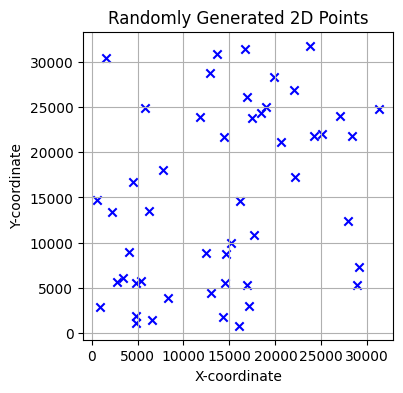

In [2]:


def generate_points(n):
    points = set()
    while len(points) < n:
        x = random.randint(0, 32767)
        y = random.randint(0, 32767)
        points.add((x, y))
    return list(points)

test_points = generate_points(50)

# Extract x and y coordinates
Qx = [p[0] for p in test_points]
Rx = [p[1] for p in test_points]

# Plot
plt.figure(figsize=(4, 4))
plt.scatter(Qx, Rx, color='blue', marker='x')
plt.title('Randomly Generated 2D Points')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()


In [3]:
def calculate_distance(point1, point2):
    
    x1 = point1[0]
    y1 = point1[1]

    x2 = point2[0]
    y2 = point2[1]

    diff_x = x1 - x2
    diff_y = y1 - y2

    diff_x_squared = diff_x * diff_x
    diff_y_squared = diff_y * diff_y

    distance = math.sqrt(diff_x_squared + diff_y_squared)

    return distance

In [4]:
def merge_sort(points, axis):
    if len(points) <= 1:
        return points

    mid = len(points) // 2
    left = merge_sort(points[:mid], axis)
    right = merge_sort(points[mid:], axis)

    return merge(left, right, axis)

def merge(left, right, axis):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i][axis] < right[j][axis]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result


### Brute Force Approach

In [5]:
def brute_force_closest_pair(points):
    min_dist = float('inf')
    best_pair = (0, 0)
    n = len(points)

    for i in range(n):
        for j in range(i + 1, n):
            d = calculate_distance(points[i], points[j])
            if d < min_dist:
                min_dist = d
                best_pair = (i, j)

    return best_pair, min_dist


### Divide and Conquer Apporach

In [6]:
def closest_pair_rec(Px, Py):
    n = len(Px)
    
    if n <= 3: #Base Case
        return brute_force_closest_pair(Px)
    
    mid = n // 2
    middle_x = Px[mid][0]
    Qx = Px[:mid]
    Rx = Px[mid:]
    
    Qy = [p for p in Py if p[0] <= middle_x]
    Ry = [p for p in Py if p[0] > middle_x]
    
    pair_left, dist_left = closest_pair_rec(Qx, Qy)
    pair_right, dist_right = closest_pair_rec(Rx, Ry)
    
    delta = min(dist_left, dist_right)
    best_pair = pair_left if dist_left < dist_right else pair_right
    
    strip = [p for p in Py if abs(p[0] - middle_x) < delta]
    
    min_dist_strip = delta
    best_pair_strip = best_pair

    for i in range(len(strip)):
        for j in range(i + 1, min(i + 16, len(strip))):
            d = calculate_distance(strip[i], strip[j])
            if d < min_dist_strip:
                min_dist_strip = d
                best_pair_strip = (strip[i], strip[j])
    
    # Return the best pair and distance
    if min_dist_strip < delta:
        return best_pair_strip, min_dist_strip
    elif dist_left < dist_right:
        return pair_left, dist_left
    else:
        return pair_right, dist_right
    

def closest_pair_dc(points):
    # Sort by x and y
    Px = merge_sort(points, 0)
    Py = merge_sort(points, 1) 
    return closest_pair_rec(Px, Py)


### Running from 10k to 100k point 

In [7]:
def run_experiment():

    sizes = list(range(10000, 55000, 5000)) 
    # sizes = list(range(100, 1001, 100))     
    num_runs = 10 

    bf_ls = []
    dc_ls = []  

    for n in sizes:
        bf_times = []
        dc_times = []  
        for i in range(num_runs):
            pts = generate_points(n)  # same random points

            # Time cal for brute-force
            start_bf = time.time()

            brute_force_closest_pair(pts)
            end_bf = time.time()
            bf_times.append((end_bf - start_bf) * 1000)  


            # Time calculation for divide-and-conquer
            start_dc = time.time()
            closest_pair_dc(pts)
            end_dc = time.time()
            dc_times.append((end_dc - start_dc) * 1000)  
        # Get average times
        avg_bf = sum(bf_times) / len(bf_times)
        avg_dc = sum(dc_times) / len(dc_times)

        print('Size:', n, '\nBF Avg Time', avg_bf)
        print('D&C Avg Time', avg_dc)

        # Save results with theoretical complexity for reference
        bf_ls.append((n, n ** 2, avg_bf)) 
        dc_ls.append((n, n * math.log2(n), avg_dc)) 

    return bf_ls, dc_ls


In [8]:
#Fucntion call
bf_data, dc_data = run_experiment()

Size: 10000 
BF Avg Time 18659.67218875885
D&C Avg Time 205.71165084838867
Size: 15000 
BF Avg Time 43922.777795791626
D&C Avg Time 348.47052097320557
Size: 20000 
BF Avg Time 55345.01097202301
D&C Avg Time 327.2564649581909
Size: 25000 
BF Avg Time 86633.753490448
D&C Avg Time 420.42698860168457
Size: 30000 
BF Avg Time 125461.30006313324
D&C Avg Time 534.2977046966553
Size: 35000 
BF Avg Time 173704.84960079193
D&C Avg Time 680.1201343536377
Size: 40000 
BF Avg Time 243362.2178554535
D&C Avg Time 772.2815990447998
Size: 45000 
BF Avg Time 394045.2222585678
D&C Avg Time 1069.2346572875977
Size: 50000 
BF Avg Time 398554.2171239853
D&C Avg Time 1002.1895885467529


### Creating csv file to store the Empircal and predicted values of the two algorithms

In [9]:
# Put brute-force data into a table
bf_df = pd.DataFrame(bf_data, columns=["n", "n^2", "EmpiricalRT"])
bf_df["Ratio"] = bf_df["EmpiricalRT"] / bf_df["n^2"] 
c1 = bf_df["Ratio"].max()  
bf_df["PredictedRT"] = c1 * bf_df["n^2"]  

# same for divide-and-conquer
dc_df = pd.DataFrame(dc_data, columns=["n", "nlogn", "EmpiricalRT"])
dc_df["Ratio"] = dc_df["EmpiricalRT"] / dc_df["nlogn"]
c2 = dc_df["Ratio"].max()
dc_df["PredictedRT"] = c2 * dc_df["nlogn"]

In [10]:
print(c1, c2)

0.0001952123457590739 0.0016746134588592919


In [11]:
# Save tables
bf_df.to_csv("table_alg1.csv", index=False)
dc_df.to_csv("table_alg2.csv", index=False)

### Ploting the rquired Graphs

Experiment complete. Tables and graphs saved.


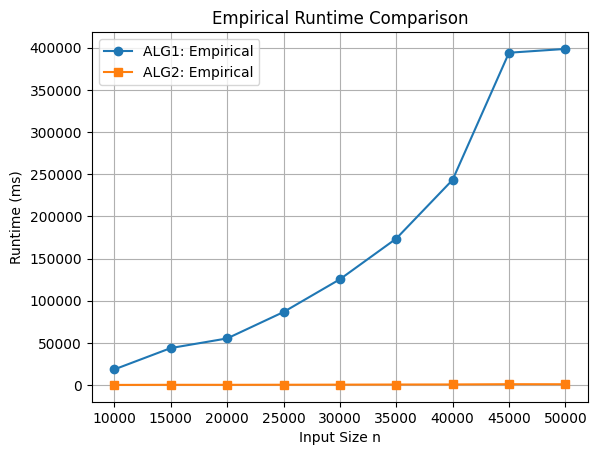

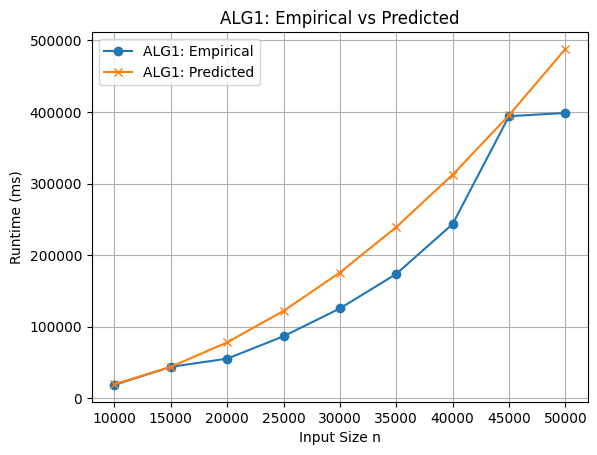

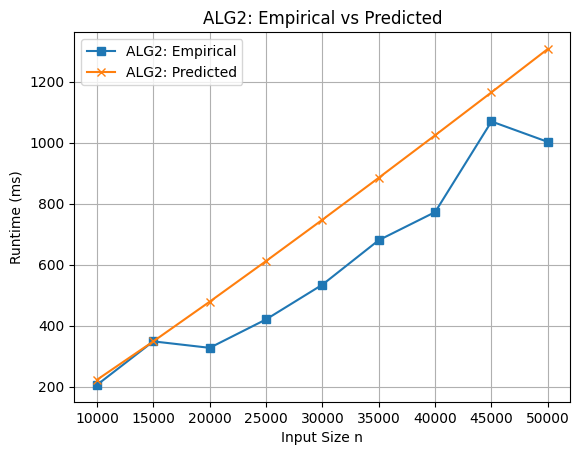

In [12]:
# Plotting
plt.figure()
plt.plot(bf_df["n"], bf_df["EmpiricalRT"], marker='o', label="ALG1: Empirical")
plt.plot(dc_df["n"], dc_df["EmpiricalRT"], marker='s', label="ALG2: Empirical")
plt.xlabel("Input Size n")
plt.ylabel("Runtime (ms)")
plt.title("Empirical Runtime Comparison")
plt.legend()
plt.grid(True)
plt.savefig("graph_empirical_comparison.png")

plt.figure()
plt.plot(bf_df["n"], bf_df["EmpiricalRT"], marker='o', label="ALG1: Empirical")
plt.plot(bf_df["n"], bf_df["PredictedRT"], marker='x', label="ALG1: Predicted")
plt.title("ALG1: Empirical vs Predicted")
plt.xlabel("Input Size n")
plt.ylabel("Runtime (ms)")
plt.legend()
plt.grid(True)
plt.savefig("graph_alg1_prediction.png")

plt.figure()
plt.plot(dc_df["n"], dc_df["EmpiricalRT"], marker='s', label="ALG2: Empirical")
plt.plot(dc_df["n"], dc_df["PredictedRT"], marker='x', label="ALG2: Predicted")
plt.title("ALG2: Empirical vs Predicted")
plt.xlabel("Input Size n")
plt.ylabel("Runtime (ms)")
plt.legend()
plt.grid(True)
plt.savefig("graph_alg2_prediction.png")

print("Experiment complete. Tables and graphs saved.")

Appendix

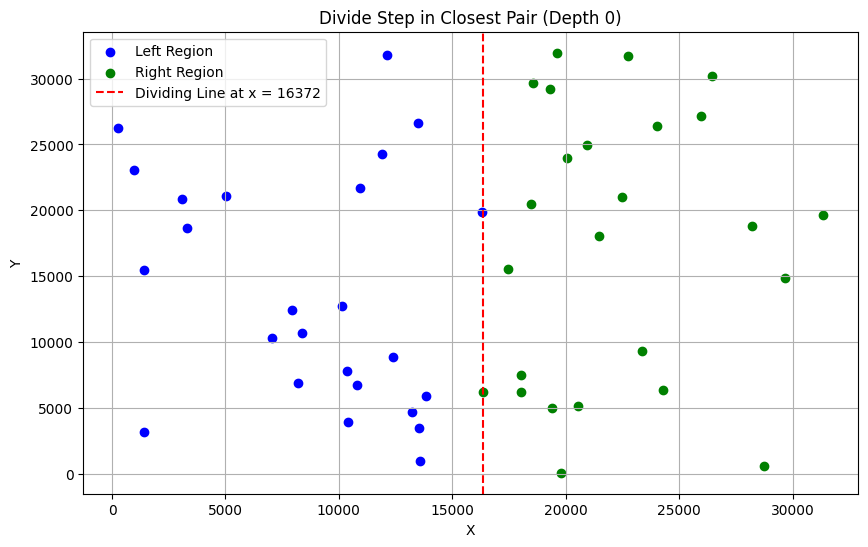

(((19311, 29242), (18569, 29629)), 836.8590084357102)

In [13]:
import matplotlib.pyplot as plt

def closest_pair_rec_pt(Px, Py, depth=0):
    n = len(Px)
    
    if n <= 3:
        return brute_force_closest_pair(Px)
    
    mid = n // 2
    middle_x = Px[mid][0]
    Qx = Px[:mid]
    Rx = Px[mid:]
    
    Qy = [p for p in Py if p[0] <= middle_x]
    Ry = [p for p in Py if p[0] > middle_x]
    
    # ---------------- Plot at the first recursive level ---------------- #
    if depth == 0:
        Qx_coords = [p[0] for p in Qx]
        Qy_coords = [p[1] for p in Qx]
        Rx_coords = [p[0] for p in Rx]
        Ry_coords = [p[1] for p in Rx]

        plt.figure(figsize=(10, 6))
        plt.scatter(Qx_coords, Qy_coords, color='blue', label='Left Region')
        plt.scatter(Rx_coords, Ry_coords, color='green', label='Right Region')
        plt.axvline(x=middle_x, color='red', linestyle='--', label=f'Dividing Line at x = {middle_x}')
        plt.title("Divide Step in Closest Pair (Depth 0)")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.grid(True)
        plt.show()
    # ------------------------------------------------------------------- #

    pair_left, dist_left = closest_pair_rec_pt(Qx, Qy, depth + 1)
    pair_right, dist_right = closest_pair_rec_pt(Rx, Ry, depth + 1)
    
    delta = min(dist_left, dist_right)
    best_pair = pair_left if dist_left < dist_right else pair_right
    
    strip = [p for p in Py if abs(p[0] - middle_x) < delta]
    
    min_dist_strip = delta
    best_pair_strip = best_pair

    for i in range(len(strip)):
        for j in range(i + 1, min(i + 16, len(strip))):
            d = calculate_distance(strip[i], strip[j])
            if d < min_dist_strip:
                min_dist_strip = d
                best_pair_strip = (strip[i], strip[j])
    
    if min_dist_strip < delta:
        return best_pair_strip, min_dist_strip
    elif dist_left < dist_right:
        return pair_left, dist_left
    else:
        return pair_right, dist_right
    


def closest_pair_dc(points):
    # Sort by x and y
    Px = merge_sort(points, 0)  # sort by x
    Py = merge_sort(points, 1)  # sort by y
    return closest_pair_rec_pt(Px, Py)


ptst = generate_points(50)

closest_pair_dc(ptst)



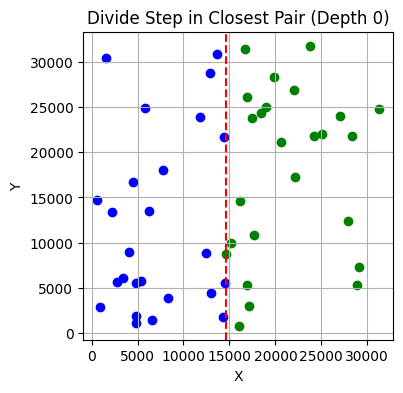

In [14]:
# Sort points by x-coordinate
sorted_points = sorted(test_points)
mid = len(sorted_points) // 2
middle_x = sorted_points[mid][0]

# Split into left and right halves
left_half = sorted_points[:mid]
right_half = sorted_points[mid:]

# Extract coordinates for plotting
Qx_coords = [p[0] for p in left_half]
Qy_coords = [p[1] for p in left_half]
Rx_coords = [p[0] for p in right_half]
Ry_coords = [p[1] for p in right_half]

# Plot left and right regions
plt.figure(figsize=(4, 4))
plt.scatter(Qx_coords, Qy_coords, color='blue', label='Left Region')
plt.scatter(Rx_coords, Ry_coords, color='green', label='Right Region')
plt.axvline(x=middle_x, color='red', linestyle='--', label=f'Dividing Line at x = {middle_x}')
plt.title("Divide Step in Closest Pair (Depth 0)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()